# Module 2: Data wrangling using `pandas`

Course: GEOL 557 Earth Resource Data Science I: Fundamentals

created by Zane Jobe and Thomas Martin, Colorado School of Mines https://core.mines.edu

## Overview
This notebook will take you through python code tot import, sort, and make some very basic plots of some U-Pb detrital zircon geochronology data using `pandas`.

# TO DO: change path to GEOL_557

In [1]:
import pandas as pd # this imports pandas to this notebook
import numpy as np

from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive')

# these next two things shuoldnt need to be changed if you set up your Google Drive folder correctly (see Module 1)
folder_path = 'gdrive/My Drive/1_PythonCourse/Mines-ERDS/module_2/' # makes a path
file_name = 'Daniels_GSA_2017304_appendix2.xlsx' # file name

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Let's load in a dataset
The data we want is located here https://doi.org/10.1130/B31757.1 It is the Appendix 2 file ("Supplemental Information 2" down at the bottom   of the   page). Two tabs in that xlsx are useful to us, the "high throughput" and "low throughput" tabs, which are U-Pb ages from detrital zircons from the Magallanes Basin, Chile. Also, by default, `pandas` imports the first sheet, but we also want to specify that, so we use `sheet_name` for that. 

Before we load the data, the Excel file is weird, and has a linked IsoPlot function in the file that needs to be broken/deleted. I took care of breaking this link and saving as a new file, which fixes weird encryption issues with Excel format. Yet another reason to just use a csv file... 

We load it with the pandas `read_xls` function into a DataFrame called `df`:

In [2]:
df=pd.read_excel(folder_path + file_name, sheet_name='HighThroughputAges - LA-ICP-MS') # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

,"University of Calgary, Centre for Pure and Applied Tectonics and Thermochronology",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15-CC-01 HT,NaN,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,Data for Tera-Wasserburg plot2,NaN,NaN,NaN,208Pb/206Pb,2σx (%),Data for Wetherill plot2,NaN,NaN,NaN,NaN,208Pb/232Th,2σx (%),Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208Pb/232Th,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,NaN,NaN,NaN,NaN
2,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,2σx (%),207Pb/206Pb,2σx (%),NaN,NaN,207Pb/235Pb,2σx (%),206Pb/238U,2σx (%),Rho,NaN,NaN,207Pb/206Pb,2σx (ABS),2σtotal (ABS),206Pb/238U,2σx (ABS),2σtotal (ABS),207Pb/235Pb,2σx (ABS),2σtotal (ABS),NaN,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
3,UK012,UK012_356,NaN,50,1110,114.4,1.39683,NaN,NaN,100,7.48514,0.05,27.0501,NaN,NaN,0.06894,28.0667,0.01,7.48514,-0.14372,NaN,NaN,NaN,NaN,NaN,64.144,4.77746,4.84284,67.6931,18.3817,18.4071,NaN,NaN,NaN,71.8229,NaN,NaN,64.144,4.77746,7.44803,4.84284,7.5119
4,UK012,UK012_576,NaN,378,8100,886,2.15572,NaN,NaN,95.511,4.15046,0.0475,12.6385,NaN,NaN,0.0685712,13.3026,0.01047,4.15046,-0.050677,NaN,NaN,NaN,NaN,NaN,67.1431,2.77228,2.89386,67.3426,8.66791,8.72109,NaN,NaN,NaN,96.5521,NaN,NaN,67.1431,2.77228,4.12892,2.89386,4.30865


Hmm, that doesnt look right. There are a few header lines, which are messing up the key names (currently in row `1`. You could go into Excel and delete them, but it's good practice to modify the input file as little as possible. Also, there are 13 samples and two tabs, so that means you would have to fix these issues 26 times manually, which is sub-optimal. Let's automate the boring stuff!

In [3]:
df=pd.read_excel(folder_path + file_name, sheet_name='HighThroughputAges - LA-ICP-MS', skiprows=2) # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

,15-CC-01 HT,Unnamed: 1,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,Data for Tera-Wasserburg plot2,Unnamed: 10,Unnamed: 11,Unnamed: 12,208Pb/206Pb,2σx (%),Data for Wetherill plot2,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,208Pb/232Th,2σx (%).1,Dates,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,208Pb/232Th.1,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,2σx (%),207Pb/206Pb,2σx (%),NaN,NaN,207Pb/235Pb,2σx (%),206Pb/238U,2σx (%),Rho,NaN,NaN,207Pb/206Pb,2σx (ABS),2σtotal (ABS),206Pb/238U,2σx (ABS),2σtotal (ABS),207Pb/235Pb,2σx (ABS),2σtotal (ABS),NaN,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
1,UK012,UK012_356,NaN,50,1110,114.4,1.39683,NaN,NaN,100,7.48514,0.05,27.0501,NaN,NaN,0.06894,28.0667,0.01,7.48514,-0.14372,NaN,NaN,NaN,NaN,NaN,64.144,4.77746,4.84284,67.6931,18.3817,18.4071,NaN,NaN,NaN,71.8229,NaN,NaN,64.144,4.77746,7.44803,4.84284,7.5119
2,UK012,UK012_576,NaN,378,8100,886,2.15572,NaN,NaN,95.511,4.15046,0.0475,12.6385,NaN,NaN,0.0685712,13.3026,0.01047,4.15046,-0.050677,NaN,NaN,NaN,NaN,NaN,67.1431,2.77228,2.89386,67.3426,8.66791,8.72109,NaN,NaN,NaN,96.5521,NaN,NaN,67.1431,2.77228,4.12892,2.89386,4.30865
3,UK012,UK012_632,NaN,149,2760,282,1.88377,NaN,NaN,95.1475,5.095,0.057,13.8708,NaN,NaN,0.0825998,14.7769,0.01051,5.095,0.17313,NaN,NaN,NaN,NaN,NaN,67.3983,3.41605,3.51617,80.5862,11.4484,11.5053,NaN,NaN,NaN,2.10702,NaN,NaN,67.3983,3.41605,5.06846,3.51617,5.17993
4,UK012,UK012_236,NaN,506,9180,787,1.8345,NaN,NaN,94.6074,4.41792,0.0546,8.78788,NaN,NaN,0.0795736,9.8359,0.01057,4.41792,0.03337,NaN,NaN,NaN,NaN,NaN,67.781,2.97883,3.0944,77.744,7.36153,7.44394,NaN,NaN,NaN,1.14242,NaN,NaN,67.781,2.97883,4.39478,3.0944,4.47933


OK, that's a bit better, but still not great. If you look at the Excel, it has empty rows to separate the samples, and merged rows to indicate column names and subnames. This looks snazzy in Excel, but is a pain when doing data analysis because it means that one row is empty (hence the `Unnamed:1` as the second column name. 

First, let's get rid of the empty rows:

In [4]:
print('df has length', len(df), 'before dropping rows with no data')
df.dropna(how='all', inplace=True)
print('df has length', len(df), 'after dropping rows with no data')

df has length 8306 before dropping rows with no data
df has length 8273 after dropping rows with no data


Now to deal with the column names. Ideally, we would rename the column names so that the name and the subname is in each, like this first example:

In [5]:
df.rename({'Data for Tera-Wasserburg plot2'	: 'TeraWasserburg_238U/206Pb'},axis=1, inplace=True)
df.head()

,15-CC-01 HT,Unnamed: 1,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,TeraWasserburg_238U/206Pb,Unnamed: 10,Unnamed: 11,Unnamed: 12,208Pb/206Pb,2σx (%),Data for Wetherill plot2,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,208Pb/232Th,2σx (%).1,Dates,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,208Pb/232Th.1,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,2σx (%),207Pb/206Pb,2σx (%),NaN,NaN,207Pb/235Pb,2σx (%),206Pb/238U,2σx (%),Rho,NaN,NaN,207Pb/206Pb,2σx (ABS),2σtotal (ABS),206Pb/238U,2σx (ABS),2σtotal (ABS),207Pb/235Pb,2σx (ABS),2σtotal (ABS),NaN,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
1,UK012,UK012_356,NaN,50,1110,114.4,1.39683,NaN,NaN,100,7.48514,0.05,27.0501,NaN,NaN,0.06894,28.0667,0.01,7.48514,-0.14372,NaN,NaN,NaN,NaN,NaN,64.144,4.77746,4.84284,67.6931,18.3817,18.4071,NaN,NaN,NaN,71.8229,NaN,NaN,64.144,4.77746,7.44803,4.84284,7.5119
2,UK012,UK012_576,NaN,378,8100,886,2.15572,NaN,NaN,95.511,4.15046,0.0475,12.6385,NaN,NaN,0.0685712,13.3026,0.01047,4.15046,-0.050677,NaN,NaN,NaN,NaN,NaN,67.1431,2.77228,2.89386,67.3426,8.66791,8.72109,NaN,NaN,NaN,96.5521,NaN,NaN,67.1431,2.77228,4.12892,2.89386,4.30865
3,UK012,UK012_632,NaN,149,2760,282,1.88377,NaN,NaN,95.1475,5.095,0.057,13.8708,NaN,NaN,0.0825998,14.7769,0.01051,5.095,0.17313,NaN,NaN,NaN,NaN,NaN,67.3983,3.41605,3.51617,80.5862,11.4484,11.5053,NaN,NaN,NaN,2.10702,NaN,NaN,67.3983,3.41605,5.06846,3.51617,5.17993
4,UK012,UK012_236,NaN,506,9180,787,1.8345,NaN,NaN,94.6074,4.41792,0.0546,8.78788,NaN,NaN,0.0795736,9.8359,0.01057,4.41792,0.03337,NaN,NaN,NaN,NaN,NaN,67.781,2.97883,3.0944,77.744,7.36153,7.44394,NaN,NaN,NaN,1.14242,NaN,NaN,67.781,2.97883,4.39478,3.0944,4.47933


There are smarter, more automated ways to do that (using a loop or `.apply` methods), but that's a topci for another day. 

In this case, we don't really want to fool around with all those columns anyways - what we are really interested in are the ages, and so we can just drop all the columns that don't have age information. 

In [6]:
#renames the columns first
col_dict = {'15-CC-01 HT':'Sample', 'Unnamed: 1':'Spot', 'Dates':'Age_207Pb/206Pb', 'Unnamed: 25':'Age_206Pb/238U', 'Unnamed: 28':'Age_207Pb/235Pb', 'Accepted Dates4':'Age_Accepted'}
df.rename(col_dict, axis=1, inplace=True)

# now let's drop all the columns we didnt rename
col_list = list(col_dict.values())
df = df.filter(col_list, axis=1) # reassign it
df.head()

,Sample,Spot,Age_207Pb/206Pb,Age_206Pb/238U,Age_207Pb/235Pb,Age_Accepted
0,Sample,Spot,207Pb/206Pb,206Pb/238U,207Pb/235Pb,Date (Ma)
1,UK012,UK012_356,NaN,64.144,67.6931,64.144
2,UK012,UK012_576,NaN,67.1431,67.3426,67.1431
3,UK012,UK012_632,NaN,67.3983,80.5862,67.3983
4,UK012,UK012_236,NaN,67.781,77.744,67.781


In [7]:
df.drop(0,axis=0, inplace=True) # get rid of first line
df.head()

,Sample,Spot,Age_207Pb/206Pb,Age_206Pb/238U,Age_207Pb/235Pb,Age_Accepted
1,UK012,UK012_356,NaN,64.144,67.6931,64.144
2,UK012,UK012_576,NaN,67.1431,67.3426,67.1431
3,UK012,UK012_632,NaN,67.3983,80.5862,67.3983
4,UK012,UK012_236,NaN,67.781,77.744,67.781
5,UK012,UK012_442,NaN,68.1637,73.4729,68.1637


And lastly, from the way that xls was formatted, there should be some extra rows that only had values in the first column that we renamed to `Sample`, so let's look at that column:

In [8]:
print(df.Sample.value_counts())
print(df.Sample.value_counts().values)


UK006                                                                                                                                                                                                                                                                                                                                                  640
Uk008                                                                                                                                                                                                                                                                                                                                                  640
UK007                                                                                                                                                                                                                                                                                                             

Whoa, lots of weird things there. The way that xls is formatted is really not great! It would be smart to replace the sample names beginning with `UK` with the ones beginning with `15-`, but for now we won't mess with that. Let's just get rid of the rows that only have data in the `Sample` column, and no other data:

In [9]:
# Which columns have NaNs
df.isnull().sum()

Sample                0
Spot                 32
Age_207Pb/206Pb    5595
Age_206Pb/238U       32
Age_207Pb/235Pb      32
Age_Accepted       1588
dtype: int64

In [10]:
# get rid of all rows where Spot is NaN
df.dropna(axis=0, subset = ['Spot'], inplace=True)

# now check the samples
print(df.isnull().sum())
print(df.Sample.value_counts())

Sample                0
Spot                  0
Age_207Pb/206Pb    5575
Age_206Pb/238U        0
Age_207Pb/235Pb       0
Age_Accepted       1568
dtype: int64
Uk008     640
UK006     640
UK007     639
UK009     639
UK003     639
UK011     638
UK001     638
UK004     638
UK013     638
UK002     634
UK012     632
UK005     623
UK010     590
Sample     12
Name: Sample, dtype: int64


Last thing we need to do is to convert the objects to other dtypes:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8240 entries, 1 to 8288
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sample           8240 non-null   object
 1   Spot             8240 non-null   object
 2   Age_207Pb/206Pb  2665 non-null   object
 3   Age_206Pb/238U   8240 non-null   object
 4   Age_207Pb/235Pb  8240 non-null   object
 5   Age_Accepted     6672 non-null   object
dtypes: object(6)
memory usage: 450.6+ KB


In [50]:
# get rid of strings in the age columns
df[df.columns[2:6]] = df[df.columns[2:6]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8240 entries, 1 to 8288
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample           8240 non-null   object 
 1   Spot             8240 non-null   object 
 2   Age_207Pb/206Pb  8240 non-null   float64
 3   Age_206Pb/238U   8240 non-null   float64
 4   Age_207Pb/235Pb  8240 non-null   float64
 5   Age_Accepted     8240 non-null   float64
dtypes: float64(4), object(2)
memory usage: 450.6+ KB


Nice! Now let's try a simple plot:


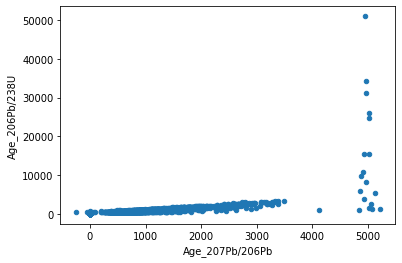

In [57]:
df.plot.scatter(x='Age_207Pb/206Pb', y='Age_206Pb/238U')

In [58]:
df['Age_206Pb/238U'].max()

50935.55103170099

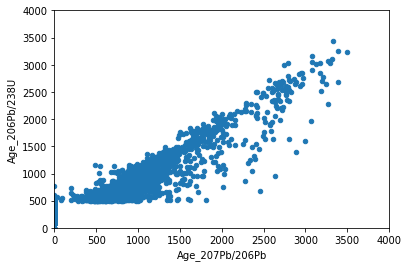

In [59]:
df.plot.scatter(x='Age_207Pb/206Pb', y='Age_206Pb/238U', xlim=[0, 4000], ylim=[0,4000])